In [10]:
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
'''import scipy.integrate as integrate'''
import matplotlib.pyplot as plt
import matplotlib
import math
import statistics
import sys
import operator
import collections
import time
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import fmin_cobyla
from IPython.display import clear_output

In [27]:
g=2.565
gam=0.02
om=0.16
xi=0.05
#R=1 #param
C=0.25
X = np.array([ -1.2167034 ,  0.94510265, -0.02208411,  0.60319202,  0.09466782])
global X

In [28]:
def Harvest(x,t,R):
    #defining variables
    q = x[0] #q is first state
    p = x[1]
    v = x[2]
    Edrive = x[3]
    Ediss = x[4]
    #defining equations
    dqdt = p
    dpdt = -q**3+q + g*math.cos(om*t)-2*gam*p+xi*v
    dvdt = -v/(R*C)-(xi/C)*p
    dEdrive_dt = g*math.cos(om*t)*p #energy absorbed from drive
    dEdiss_dt = 2*gam*p*p # energy disspated through Gamma
#    dEC = C*v*(-lam*v-(xi/C)*p) #energy in the capacitor
    dER = v*v/R #Energy in the resistor
#    dOsc = p*(-q * q * q +  q + g * math.cos(om * t) - 2 * gam * p + xi * v) + (
#                - q * q * q + q) * p # Energy IN the oscillator
    return [dqdt,dpdt,dvdt,dEdrive_dt,dEdiss_dt]

In [29]:
R=1
global R

In [30]:
def f(x, t):
    return Harvest(x,t,R)

In [31]:
x= odeint(f, X, np.linspace(0,1/om,num=50))

In [32]:
res_arr=np.linspace(0.1,20,500)
e_diss_l=[]
avg_diss_l=[]
for res in res_arr:
    def f(x, t):
        return Harvest(x,t,res)
    x=odeint(f, X, np.linspace(0,1/om,num=50))
    for i in x:
        e_diss_l.append(i[4])
    avg_diss=np.mean(e_diss_l)
    avg_diss_l.append(avg_diss)
    e_diss_l.clear()
#len(x)
    #
    

In [33]:
len(avg_diss_l)

500

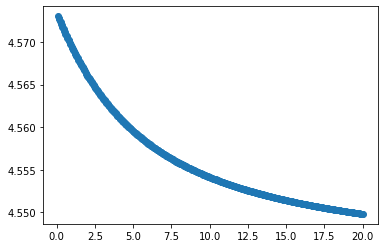

In [34]:
plt.scatter(res_arr,avg_diss_l)